In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('processed_data/feature_train.csv')

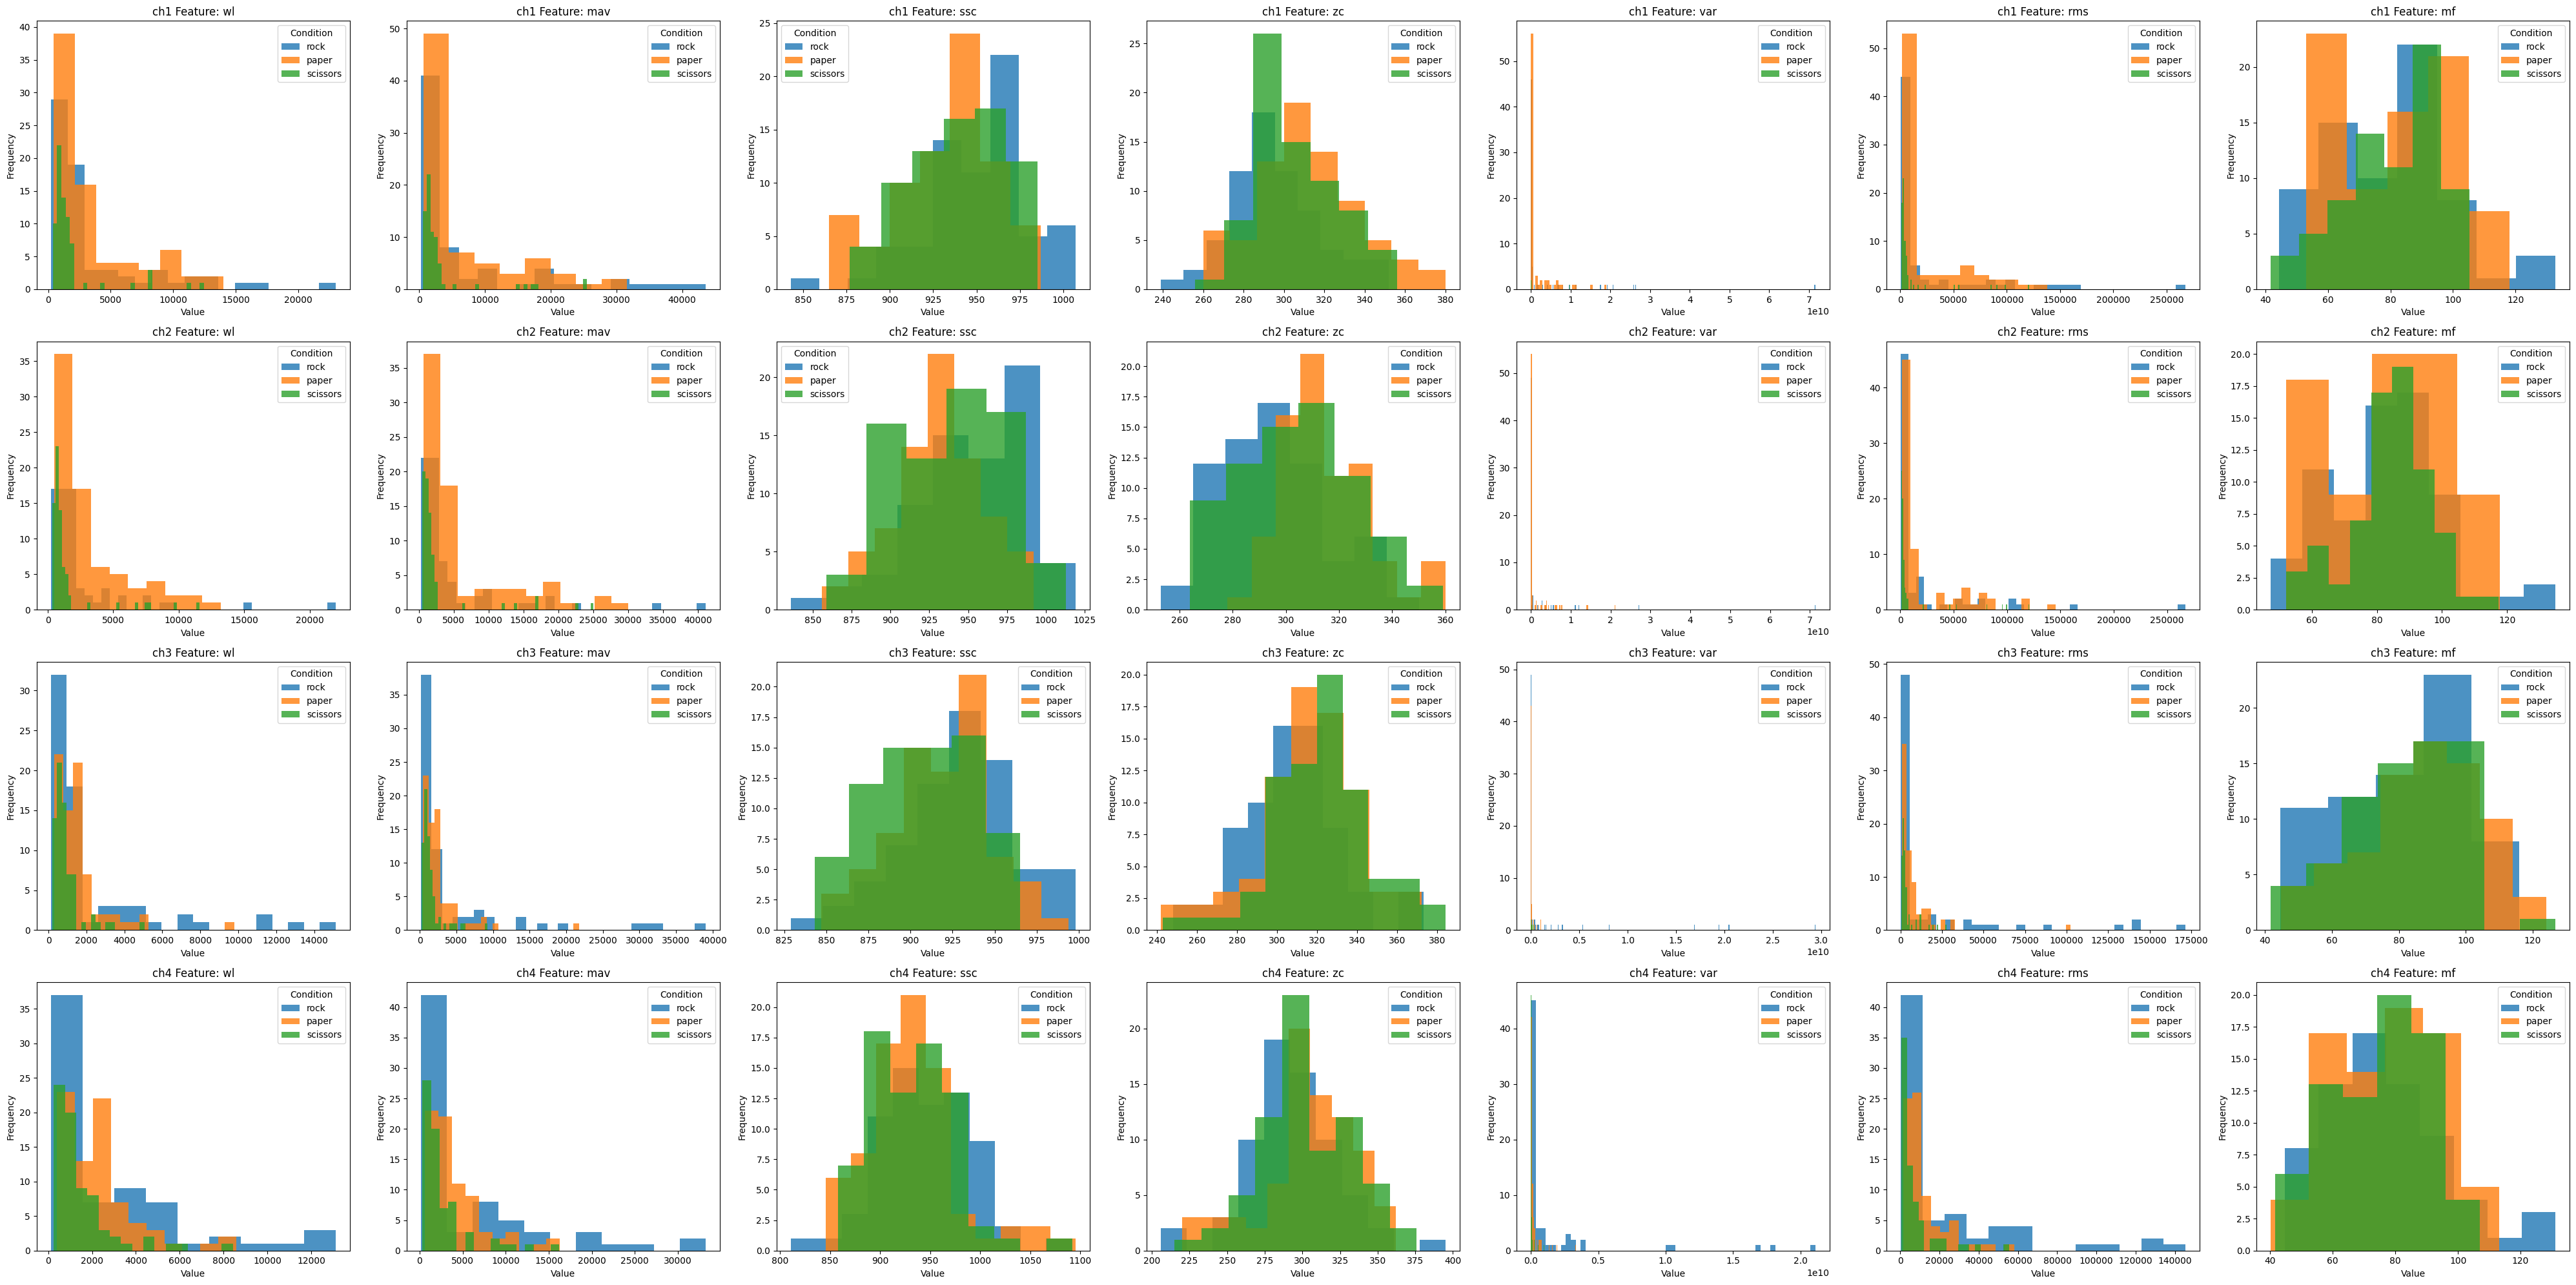

In [3]:
features = ['wl', 'mav', 'ssc', 'zc', 'var', 'rms','mf']
channels = ['ch1', 'ch2', 'ch3', 'ch4']
fig, axs = plt.subplots(4, 7, figsize=(40, 20))

for i, ch in enumerate(channels):
    for j, feature in enumerate(features):
        col = f"{ch}_{feature}"
        ax = axs[i, j]  # Select the appropriate subplot
        
        # Plot histogram for each condition
        for label, group in df.groupby('label'):
            label_name = ['rock', 'paper', 'scissors'][label]  # Assumes Label values are 0, 1, 2
            ax.hist(group[col], bins="fd", alpha=0.8, label=label_name)
        
        # Add legend, labels, and title
        ax.legend(title='Condition')
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')
        ax.set_title(f'{ch} Feature: {feature}')

# Adjust spacing between subplots
plt.tight_layout()

# Save the figure
plt.savefig("feature_plots/all.png")

# Show the plot
plt.show()